 #### **Chapter 3 Foundations of AI and Tools for Chemists**

Test your Python Environment

In [1]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 1.24.3


Use Python Dictionary to store atomic weights of elemnts and perform summation

In [2]:
atom = {"H": 1.008, "C": 12.01, "O": 16.00}
mw = 2*atom["C"] + 6*atom["H"] + 1*atom["O"]
print("Molecular weight of C2H6O:", mw)

Molecular weight of C2H6O: 46.068


In [3]:
!pip install rdkit



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
from rdkit  import Chem
mol = Chem.MolFromSmiles('CCO') # a simple molecule, ethanol print(mol)
print(mol)

In [5]:
print(Chem.MolToSmiles(mol))

CCO


You can use read the Mol file as SMILE string or MOL file


In [6]:
from rdkit import Chem
mol = Chem.MolFromSmiles("CCO")

In [7]:
mol2 = Chem.MolFromMolFile("molecule.mol")

In [8]:
print(mol2)

In [9]:
for atom in mol.GetAtoms(): print(atom.GetSymbol(), atom.GetAtomicNum())

C 6
C 6
O 8


Example using GetNumAtoms function

In [10]:
methane = Chem.MolFromSmiles("C")
num_atoms = methane.GetNumAtoms()
print("Number of atoms in methane:", num_atoms)

Number of atoms in methane: 1


RDKit by default is considering only heavy atoms (non-hydrogen atoms) when a molecule is created from SMILES. In the SMILES “ C ” for methane, the hydrogen atoms are implicit. RDKit knows they are there conceptually (carbon has valence 4 so implicitly 4 hydrogens), but it doesn’t explicitly list them in the graph unless asked. This is a design choice: chemists often don’t want to deal with all the hydrogens unless necessary, for simplicity and performance. If you want to include hydrogens explicitly, you can add them:

In [11]:
methane_with_H = Chem.AddHs(methane)
print("Number of atoms in methane with H:", methane_with_H.GetNumAtoms())

Number of atoms in methane with H: 5


To illustrate access atomic information, we use example "CCO"

In [12]:
ethanol = Chem.MolFromSmiles("CCO")
for atom in ethanol.GetAtoms():
  print(atom.GetSymbol(), atom.GetMass())

C 12.011
C 12.011
O 15.999


Now, let’s consider molecular properties and descriptors. RDKit can compute many common properties or descriptors. Some are accessible as methods (e.g., Mol.GetNumHeavyAtoms() or Mol.GetMolWt() for molecular weight) and others via the Descriptors module. For example:

In [13]:
from rdkit.Chem import Descriptors
mw = Descriptors.MolWt(ethanol) # molecular weight
logp = Descriptors.MolLogP(ethanol) # Wildman-Crippen LogP
hbd = Descriptors.NumHDonors(ethanol) # number of H-bond donors
print(mw, logp, hbd)

46.069 -0.0014000000000000123 1


You can easily get output from RDKit molecules in various formats. For example:

· Get a SMILES string: Chem.MolToSmiles(mol) returns a SMILES.

· Get an InChI: if RDKit was built with the InChI library, Chem.MolToInchi(mol) gives an InChI string.

· Write to file: Chem.MolToMolFile(mol, "out.mol") will save a MOL file. If you have multiple mols, you can use SDWriter to create an SDF.

In [14]:
from rdkit import Chem
from rdkit.Chem import Descriptors
# Create a molecule from SMILES
mol = Chem.MolFromSmiles("c1ccccc1O") # phenol (benzene ring with an -OH)
if mol:
  # Basic info
  print("Molecule has", mol.GetNumAtoms(), "heavy atoms and", mol.GetNumBonds(), "bonds.")
  # Compute some descriptors
  mol_wt = Descriptors.MolWt(mol)
  num_aromatic_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetIsAromatic())
  print(f"Mol. weight = {mol_wt:.2f}, Aromatic atoms = {num_aromatic_atoms}")
  # Generate a SMILES and InChI
  print("Canonical SMILES:", Chem.MolToSmiles(mol))
  try:
    inchi = Chem.MolToInchi(mol)
    print("InChI:", inchi)
  except:
    print("InChI generation not available in this RDKit build.")

Molecule has 7 heavy atoms and 7 bonds.
Mol. weight = 94.11, Aromatic atoms = 6
Canonical SMILES: Oc1ccccc1
InChI: InChI=1S/C6H6O/c7-6-4-2-1-3-5-6/h1-5,7H


## 3.3 Hands-on Example
Example: Remove a sodium counter-ion from sodium acetate (which in SMILES might be CC(=O)[O-].[Na+] :

In [15]:
from rdkit import Chem

# Create sodium acetate molecule (acetic acid deprotonated plus Na+)
mol = Chem.MolFromSmiles("CC(=O)[O-].[Na+]")

# Split into separate fragments
frags = Chem.GetMolFrags(mol, asMols=True)

# Identify the largest fragment by number of atoms
main_mol = max(frags, key=lambda m: m.GetNumAtoms())

# Print result
print("Main fragment SMILES:", Chem.MolToSmiles(main_mol))


Main fragment SMILES: CC(=O)[O-]


Some molecules can exist in multiple tautomeric forms (like keto vs enol forms). If not standardized, you might have duplicate entries in different forms. RDKit’s MolStandardize can enumerate tautomers and pick a canonical one. For example:

In [16]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

# Example molecule (enol form of an amide, possible tautomer)
mol = Chem.MolFromSmiles("C/C(=N\\O)/C")

# Create a tautomer enumerator and canonicalize
tautomer_enumerator = rdMolStandardize.TautomerEnumerator()
canonical = tautomer_enumerator.Canonicalize(mol)

# Print result
print("Canonical tautomer SMILES:", Chem.MolToSmiles(canonical))


Canonical tautomer SMILES: CC(C)=NO


By default, RDKit represents molecules in a "non-explicit hydrogen" form (except where necessary). That means when you read a SMILES like CCO, RDKit knows there are hydrogens, but they’re implicit (each carbon in ethanol has implicit H count of 3 or 2, etc.). If you need to enumerate all atoms including hydrogens (say for certain 3D operations or explicit valence counting), you can add them:

In [17]:
from rdkit import Chem

# Create ethanol molecule
mol = Chem.MolFromSmiles("CCO")

# Add explicit hydrogens
mol_with_h = Chem.AddHs(mol)

# Compare atom counts
print("Atom count before adding H:", mol.GetNumAtoms(),
      "; after:", mol_with_h.GetNumAtoms())


Atom count before adding H: 3 ; after: 9


In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Example molecules: sodium acetate, benzoic acid, and an amine salt
smiles_list = ["CC(=O)[O-].[Na+]", "c1ccc(cc1)C(=O)O", "CN(C)C.Cl"]

cleaned_mols = []

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)

    # Remove salts by taking the largest fragment
    frags = Chem.GetMolFrags(mol, asMols=True)
    main = max(frags, key=lambda m: m.GetNumAtoms())

    # Compute molecular weight
    mw = Descriptors.MolWt(main)

    # Keep only molecules under 300 Da
    if mw < 300:
        cleaned_mols.append(Chem.MolToSmiles(main))
        print(f"Kept {Chem.MolToSmiles(main)} with MW {mw:.1f}")
    else:
        print(f"Removed {Chem.MolToSmiles(main)} with MW {mw:.1f} (too heavy)")


Kept CC(=O)[O-] with MW 59.0
Kept O=C(O)c1ccccc1 with MW 122.1
Kept CN(C)C with MW 59.1


## 3.3.2 Reaction Handling and Enumeration
For instance, consider a simple amide formation: an acid chloride and an amine react to form an amide (and HCl as a byproduct, which we might ignore or consider separately). We can write a reaction SMARTS like: C(=O)Cl.N>>C(=O)N, but we need to be careful to map the atoms. Let’s do: [C:1](=[O:2])Cl.[N:3]>>[C:1](=[O:2])[N:3]. Here, [C:1] is the carbon of the acid chloride, [O:2] the carbonyl oxygen, and Cl is the leaving group. [N:3] is the amine’s nitrogen. The product shows those mapped atoms forming a bond (carbonyl carbon now bonded to that nitrogen). This

SMARTS doesn’t explicitly account for the HCl leaving group (we are essentially ignoring it in the products by not writing it, so it will be a byproduct not captured). For our purposes of enumeration, that’s fine. Using RDKit:

In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define an amide formation reaction: acid chloride + amine → amide
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])Cl.[N:3]>>[C:1](=[O:2])[N:3]')

# Example reactants
reactant1 = Chem.MolFromSmiles("CC(=O)Cl")   # acetyl chloride
reactant2 = Chem.MolFromSmiles("NCC")        # ethylamine

# Run the reaction
products = rxn.RunReactants((reactant1, reactant2))

# Print product SMILES
for i, prod_set in enumerate(products):
    prod = prod_set[0]  # each result is a tuple of products (we have one main product here)
    print(f"Product {i+1}: {Chem.MolToSmiles(prod)}")


Product 1: CCNC(C)=O


The real power is when you have sets of reactants. Suppose you have a list of acid chlorides and a list of amines, and you want to enumerate all possible amides you could get by combining each acid chloride with each amine. You can do nested loops and call rxn.RunReactants for each combination. RDKit will return all possible products for each combination (for a deterministic reaction like this, it's usually just one main product, but some reactions could produce multiple products or stereoisomers etc.). For example:

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define amide formation reaction: acid chloride + amine → amide
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])Cl.[N:3]>>[C:1](=[O:2])[N:3]')

# Acid chlorides: acetic chloride and benzoyl chloride
acid_chlorides = [Chem.MolFromSmiles(s) for s in ["CC(=O)Cl", "O=C(Cl)c1ccccc1"]]

# Amines: ethylamine and aniline
amines = [Chem.MolFromSmiles(s) for s in ["NCC", "Nc1ccccc1"]]

# Run reactions
for acid in acid_chlorides:
    for amine in amines:
        prods = rxn.RunReactants((acid, amine))
        for prod_set in prods:
            prod_smiles = Chem.MolToSmiles(prod_set[0])
            print(f"{Chem.MolToSmiles(acid)} + {Chem.MolToSmiles(amine)} -> {prod_smiles}")


CC(=O)Cl + CCN -> CCNC(C)=O
CC(=O)Cl + Nc1ccccc1 -> CC(=O)Nc1ccccc1
O=C(Cl)c1ccccc1 + CCN -> CCNC(=O)c1ccccc1
O=C(Cl)c1ccccc1 + Nc1ccccc1 -> O=C(Nc1ccccc1)c1ccccc1


For publication-quality drawings or specific styling, RDKit can use the MolDraw2D classes to draw to SVG (vector graphics) which can be nice for including in reports as they scale without losing quality. For quick tasks, PNG via MolToImage suffices. Below is an example:

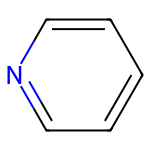

AttributeError: 'Image' object has no attribute 'save'

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image, display

# Single molecule: pyridine
mol = Chem.MolFromSmiles("c1ccncc1")
img = Draw.MolToImage(mol, size=(150, 150))
img.save("pyridine.png")  # Save to file
display(Image(filename="pyridine.png"))  # Show inline

# Multiple molecules in a grid
smiles_list = ["CCO", "c1ccccc1", "CCN(CC)CC", "C1=CC=CC=C1C(O)=O"]  # ethanol, benzene, triethylamine, benzoic acid
mols = [Chem.MolFromSmiles(s) for s in smiles_list]

img2 = Draw.MolsToGridImage(
    mols,
    molsPerRow=2,
    subImgSize=(150, 150),
    legends=["Ethanol", "Benzene", "Triethylamine", "Benzoic acid"]
)
img2.save("grid.png")
display(Image(filename="grid.png"))  # Show inline


While 2D diagrams are great for structure formulas, 3D visualization shows you the actual shape and conformation of molecules, which is important for understanding things like steric interactions, binding to proteins, etc. RDKit can compute 3D coordinates as we mentioned (embedding + force field). But RDKit itself doesn’t have a 3D viewer. It can produce coordinates and maybe write

them out to files (like MOL2 or PDB format) which you could open in external viewers (PyMOL, Chimera, VMD, etc.). However, within a Python notebook, a popular way to visualize 3D is using the py3Dmol library, which brings the capabilities of the 3Dmol.js (a WebGL viewer) to Python:

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

# Example molecule: 2,3-butanediol
mol = Chem.MolFromSmiles("CC(O)C(O)C")

# Generate 3D coordinates
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Convert to MOL block with 3D coordinates
mb = Chem.MolToMolBlock(mol)

# Create 3D viewer
view = py3Dmol.view(width=300, height=300)
view.addModel(mb, "mol")   # add model in MOL format
view.setStyle({"stick": {}})  # render as sticks
view.zoomTo()              # fit view
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.